In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
df = pd.read_csv("Lagos_House_Data.csv")
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Other Lagos Areas,2 BHK,General Lagos Estate,1056,2.0,1.0,351.63
1,Plot Area,Ready To Move,Other Lagos Areas,4 Bedroom,General Lagos Estate,2600,5.0,3.0,1080.00
2,Built-up Area,Ready To Move,Other Lagos Areas,3 BHK,General Lagos Estate,1440,2.0,3.0,558.00
3,Super built-up Area,Ready To Move,Other Lagos Areas,3 BHK,General Lagos Estate,1521,3.0,1.0,855.00
4,Super built-up Area,Ready To Move,Other Lagos Areas,2 BHK,General Lagos Estate,1200,2.0,1.0,459.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Lekki,5 Bedroom,General Lagos Estate,3453,4.0,0.0,2079.00
13316,Super built-up Area,Ready To Move,Other Lagos Areas,4 BHK,General Lagos Estate,3600,5.0,NaN,3600.00
13317,Built-up Area,Ready To Move,Other Lagos Areas,2 BHK,General Lagos Estate,1141,2.0,1.0,540.00
13318,Super built-up Area,18-Jun,Other Lagos Areas,4 BHK,General Lagos Estate,4689,4.0,1.0,4392.00


In [3]:
df1 = df.drop(['area_type', 'availability', 'society', 'balcony'], axis='columns')
df1

,location,size,total_sqft,bath,price
0,Other Lagos Areas,2 BHK,1056,2.0,351.63
1,Other Lagos Areas,4 Bedroom,2600,5.0,1080.00
2,Other Lagos Areas,3 BHK,1440,2.0,558.00
3,Other Lagos Areas,3 BHK,1521,3.0,855.00
4,Other Lagos Areas,2 BHK,1200,2.0,459.00
...,...,...,...,...,...
13315,Lekki,5 Bedroom,3453,4.0,2079.00
13316,Other Lagos Areas,4 BHK,3600,5.0,3600.00
13317,Other Lagos Areas,2 BHK,1141,2.0,540.00
13318,Other Lagos Areas,4 BHK,4689,4.0,4392.00


In [4]:
df1.isnull().sum()

location       0
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [5]:
 df2 = df1.dropna()

In [6]:
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [7]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [8]:
df3 = df2.copy()
df3

,location,size,total_sqft,bath,price
0,Other Lagos Areas,2 BHK,1056,2.0,351.63
1,Other Lagos Areas,4 Bedroom,2600,5.0,1080.00
2,Other Lagos Areas,3 BHK,1440,2.0,558.00
3,Other Lagos Areas,3 BHK,1521,3.0,855.00
4,Other Lagos Areas,2 BHK,1200,2.0,459.00
...,...,...,...,...,...
13315,Lekki,5 Bedroom,3453,4.0,2079.00
13316,Other Lagos Areas,4 BHK,3600,5.0,3600.00
13317,Other Lagos Areas,2 BHK,1141,2.0,540.00
13318,Other Lagos Areas,4 BHK,4689,4.0,4392.00


In [9]:
df3['bedrooms'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

In [10]:
df3.head()

,location,size,total_sqft,bath,price,bedrooms
0,Other Lagos Areas,2 BHK,1056,2.0,351.63,2
1,Other Lagos Areas,4 Bedroom,2600,5.0,1080.00,4
2,Other Lagos Areas,3 BHK,1440,2.0,558.00,3
3,Other Lagos Areas,3 BHK,1521,3.0,855.00,3
4,Other Lagos Areas,2 BHK,1200,2.0,459.00,2


In [11]:
df3['bedrooms'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [12]:
df3[df3.bedrooms > 20]

,location,size,total_sqft,bath,price,bedrooms
1718,Other Lagos Areas,27 BHK,8000,27.0,2070.0,27
4684,Other Lagos Areas,43 Bedroom,2400,40.0,5940.0,43


In [13]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [14]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [15]:
df3[df3['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,price,bedrooms
0,Other Lagos Areas,2 BHK,1056,2.0,351.63,2
1,Other Lagos Areas,4 Bedroom,2600,5.0,1080.00,4
2,Other Lagos Areas,3 BHK,1440,2.0,558.00,3
3,Other Lagos Areas,3 BHK,1521,3.0,855.00,3
4,Other Lagos Areas,2 BHK,1200,2.0,459.00,2
...,...,...,...,...,...,...
13315,Lekki,5 Bedroom,3453,4.0,2079.00,5
13316,Other Lagos Areas,4 BHK,3600,5.0,3600.00,4
13317,Other Lagos Areas,2 BHK,1141,2.0,540.00,2
13318,Other Lagos Areas,4 BHK,4689,4.0,4392.00,4


In [16]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bedrooms
30,Festac,4 BHK,2100 - 2850,4.0,1674.000,4
122,Eko Atlantic,4 BHK,3067 - 8156,4.0,4293.000,4
137,Other Lagos Areas,2 BHK,1042 - 1105,2.0,486.045,2
165,Sangotedo,2 BHK,1145 - 1340,2.0,391.410,2
188,Ebute Metta,2 BHK,1015 - 1540,2.0,511.200,2
410,Mowe,1 BHK,34.46Sq. Meter,1.0,166.500,1
549,Other Lagos Areas,2 BHK,1195 - 1440,2.0,573.930,2
648,Other Lagos Areas,9 Bedroom,4125Perch,9.0,2385.000,9
661,Festac,2 BHK,1120 - 1145,2.0,433.170,2
672,Other Lagos Areas,4 Bedroom,3090 - 5002,4.0,4005.000,4


In [17]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [18]:
convert_sqft_to_num('2005')

2005.0

In [19]:
convert_sqft_to_num('1042-1105')

1073.5

In [20]:
convert_sqft_to_num('34.46Sq. Meter')

In [21]:
df4 = df3.copy()
df4['total_sqft'] =df4['total_sqft'].apply(convert_sqft_to_num)
df4.head(3)

,location,size,total_sqft,bath,price,bedrooms
0,Other Lagos Areas,2 BHK,1056.0,2.0,351.63,2
1,Other Lagos Areas,4 Bedroom,2600.0,5.0,1080.00,4
2,Other Lagos Areas,3 BHK,1440.0,2.0,558.00,3


In [22]:
df4.loc[137]

location      Other Lagos Areas
size                      2 BHK
total_sqft               1073.5
bath                        2.0
price                   486.045
bedrooms                      2
Name: 137, dtype: object

In [23]:
df5 = df4.copy()
df5['price_per_sqft'] = df4['price']*1000000/df4['total_sqft'] #I had multiple by `100000` becaus the price is in indian lakh
df5.head()

,location,size,total_sqft,bath,price,bedrooms,price_per_sqft
0,Other Lagos Areas,2 BHK,1056.0,2.0,351.63,2,332982.954545
1,Other Lagos Areas,4 Bedroom,2600.0,5.0,1080.00,4,415384.615385
2,Other Lagos Areas,3 BHK,1440.0,2.0,558.00,3,387500.000000
3,Other Lagos Areas,3 BHK,1521.0,3.0,855.00,3,562130.177515
4,Other Lagos Areas,2 BHK,1200.0,2.0,459.00,2,382500.000000


In [24]:
df5['location'] = df5['location'].apply(lambda x:x.strip())
location_stats =df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Other Lagos Areas    10775
Lekki                  534
Ajah                   344
Festac                 210
Eko Atlantic           176
Yaba                   175
Abule                   96
Ebute Metta             88
Ojota                   88
Sangotedo               81
Gbagada                 74
Mowe                    73
Victoria Island         72
Abule Egba              70
Agege                   67
Surulere                53
Iyana Ipaja             52
Alimosho                42
Ikorodu                 42
Shomolu                 36
Opebi                   22
Ikeja GRA               21
Adeniyi Jones           17
Bariga                  16
Oyingbo                  9
Oshodi                   7
Ikeja                    7
Name: location, dtype: int64

In [25]:
len(location_stats[location_stats<=10])

3

In [26]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10 

location
Oyingbo    9
Oshodi     7
Ikeja      7
Name: location, dtype: int64

In [27]:
len(df5.location.unique())

27

In [28]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

25

In [29]:
df5.head(10)

,location,size,total_sqft,bath,price,bedrooms,price_per_sqft
0,Other Lagos Areas,2 BHK,1056.0,2.0,351.63,2,3.329830e+05
1,Other Lagos Areas,4 Bedroom,2600.0,5.0,1080.00,4,4.153846e+05
2,Other Lagos Areas,3 BHK,1440.0,2.0,558.00,3,3.875000e+05
3,Other Lagos Areas,3 BHK,1521.0,3.0,855.00,3,5.621302e+05
4,Other Lagos Areas,2 BHK,1200.0,2.0,459.00,2,3.825000e+05
5,Lekki,2 BHK,1170.0,2.0,342.00,2,2.923077e+05
6,Other Lagos Areas,4 BHK,2732.0,4.0,1836.00,4,6.720351e+05
7,Other Lagos Areas,4 BHK,3300.0,4.0,5400.00,4,1.636364e+06
8,Yaba,3 BHK,1310.0,3.0,569.25,3,4.345420e+05
9,Other Lagos Areas,6 Bedroom,1020.0,6.0,3330.00,6,3.264706e+06


In [30]:
df5.shape

(13247, 7)

In [31]:
df5[df5.total_sqft/df5.bedrooms<300]

,location,size,total_sqft,bath,price,bedrooms,price_per_sqft
9,Other Lagos Areas,6 Bedroom,1020.0,6.0,3330.0,6,3.264706e+06
45,Surulere,8 Bedroom,600.0,9.0,1800.0,8,3.000000e+06
58,Other Lagos Areas,6 Bedroom,1407.0,4.0,1350.0,6,9.594883e+05
68,Other Lagos Areas,8 Bedroom,1350.0,7.0,765.0,8,5.666667e+05
70,Other Lagos Areas,3 Bedroom,500.0,3.0,900.0,3,1.800000e+06
...,...,...,...,...,...,...,...
13277,Other Lagos Areas,7 Bedroom,1400.0,7.0,1962.0,7,1.401429e+06
13279,Other Lagos Areas,6 Bedroom,1200.0,5.0,1170.0,6,9.750000e+05
13281,Other Lagos Areas,5 Bedroom,1375.0,5.0,1125.0,5,8.181818e+05
13303,Other Lagos Areas,5 Bedroom,774.0,5.0,630.0,5,8.139535e+05


In [32]:
df6 = df5[~(df5.total_sqft/df5.bedrooms<300)]
df6.shape

(12503, 7)

In [33]:
df6.price_per_sqft.describe()

count    1.245700e+04
mean     5.677585e+05
std      3.751172e+05
min      2.410468e+04
25%      3.789474e+05
50%      4.764706e+05
75%      6.225000e+05
max      1.588235e+07
Name: price_per_sqft, dtype: float64

In [34]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

In [35]:
df7 = remove_pps_outliers(df6)
df7.shape

(11145, 7)

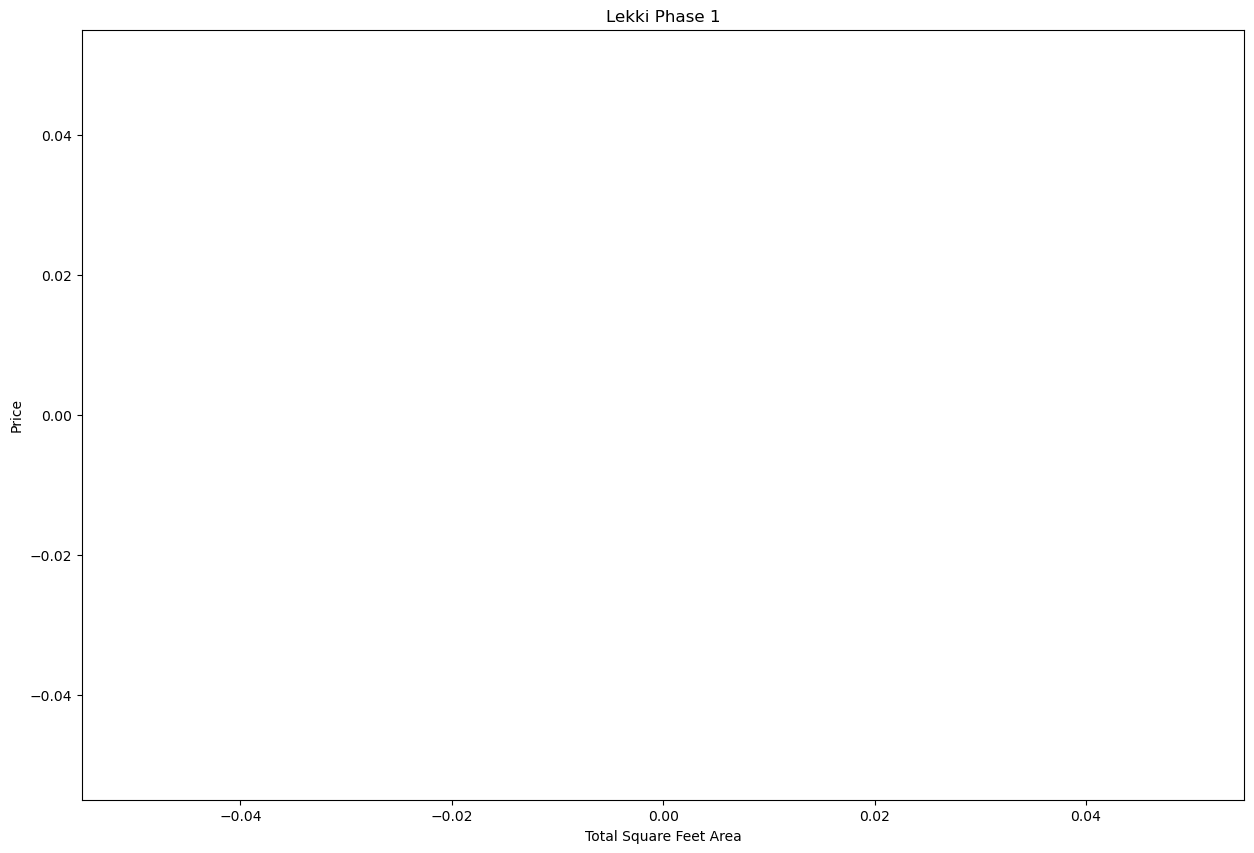

In [36]:
def plot_scatter_chart(df, location):
    bedrooms_2 = df[(df.location==location) & (df.bedrooms==2)]
    bedrooms_3 = df[(df.location==location) & (df.bedrooms==3)]
    matplotlib.rcParams['figure.figsize'] = (15, 10)
    plt.scatter(bedrooms_2.total_sqft, bedrooms_2.price, color='blue', label='2 bedrooms', s=50)
    plt.scatter(bedrooms_3.total_sqft, bedrooms_3.price, marker='+', color='green', label='3 bedrooms', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend
    
plot_scatter_chart(df7,"Lekki Phase 1")   

In [37]:
def remove_bedrooms_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bedrooms_stats = {}
        for bedrooms, bedrooms_df in location_df.groupby('bedrooms'):
            bedrooms_stats[bedrooms] = {
                'mean': np.mean(bedrooms_df.price_per_sqft),
                'std': np.std(bedrooms_df.price_per_sqft),
                'count': bedrooms_df.shape[0]
            }
        for bedrooms, bedrooms_df in location_df.groupby('bedrooms'):
            stats = bedrooms_stats.get(bedrooms-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bedrooms_df[bedrooms_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')
            
    
df8 = remove_bedrooms_outliers(df7)
df8.shape

(6143, 7)

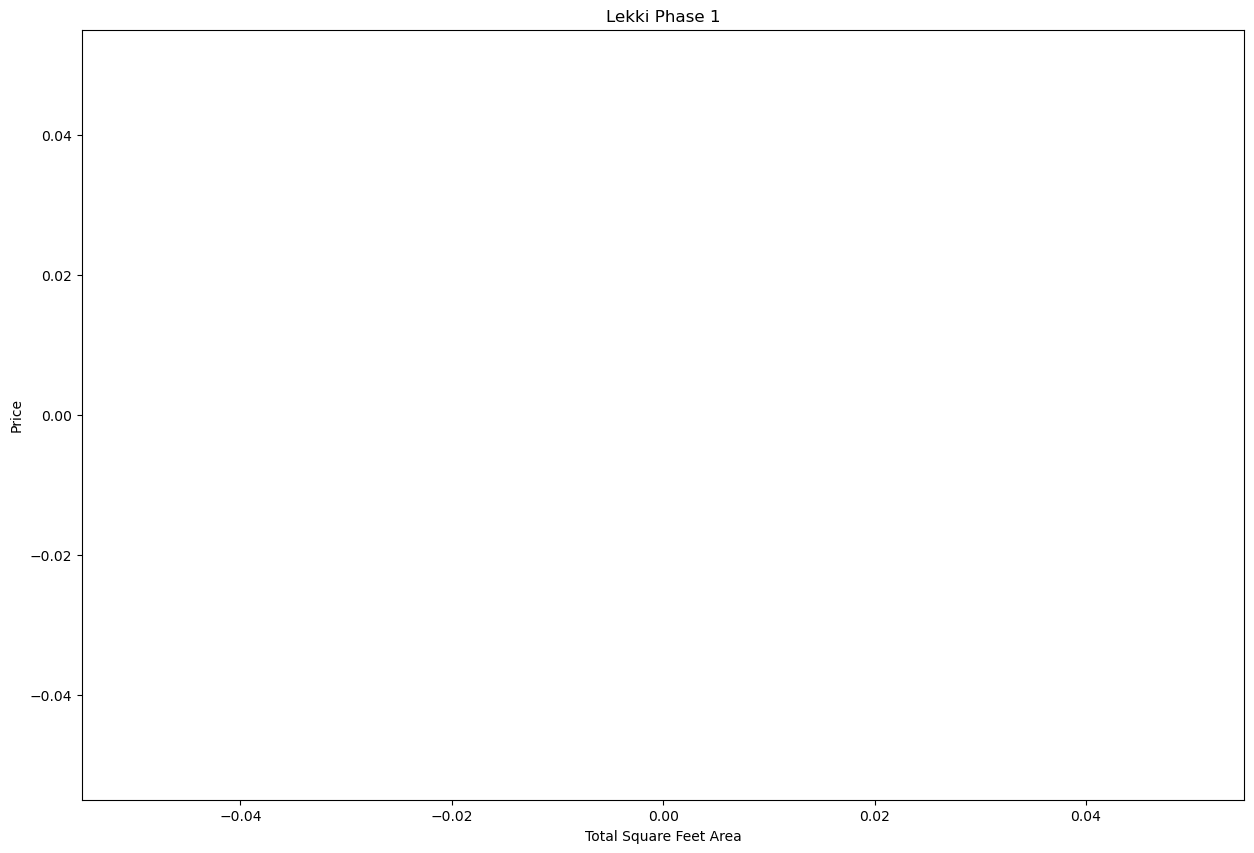

In [38]:
def plot_scatter_chart(df, location):
    bedrooms_2 = df[(df.location==location) & (df.bedrooms==2)]
    bedrooms_3 = df[(df.location==location) & (df.bedrooms==3)]
    matplotlib.rcParams['figure.figsize'] = (15, 10)
    plt.scatter(bedrooms_2.total_sqft, bedrooms_2.price, color='blue', label='2 bedrooms', s=50)
    plt.scatter(bedrooms_3.total_sqft, bedrooms_3.price, marker='+', color='green', label='3 bedrooms', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend
    
plot_scatter_chart(df8,"Lekki Phase 1")   

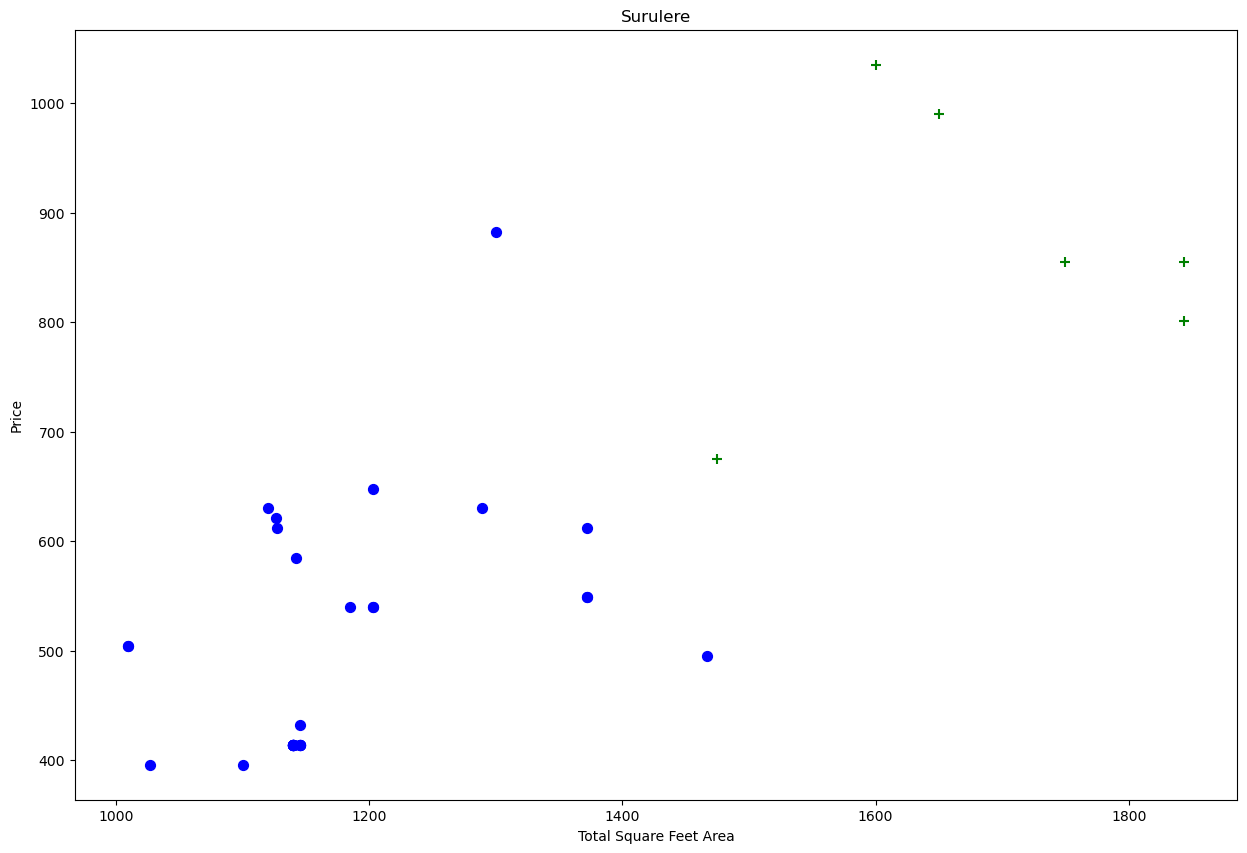

In [39]:
plot_scatter_chart(df8,"Surulere")

Text(0, 0.5, 'Count')

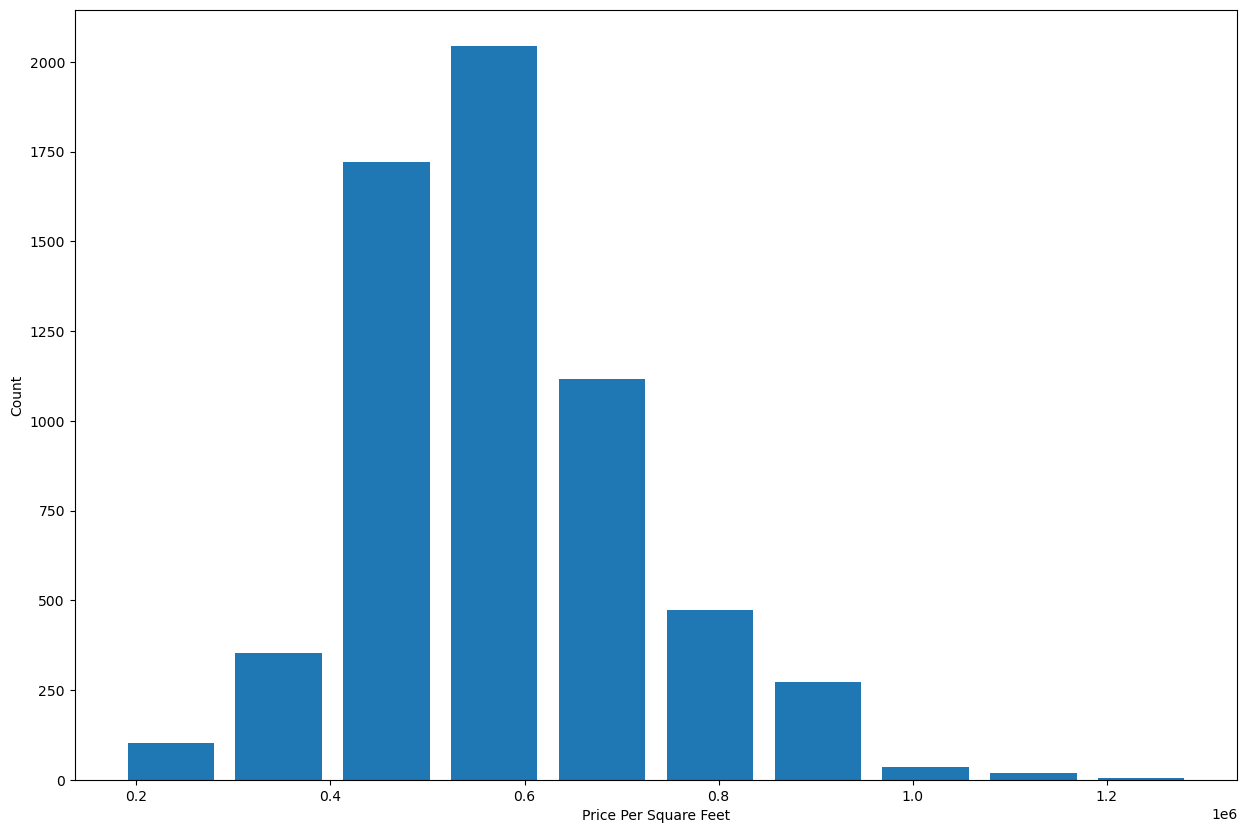

In [40]:
plt.hist(df8.price_per_sqft, rwidth=0.8)
plt.xlabel('Price Per Square Feet')
plt.ylabel('Count')

In [41]:
df8.bath.unique()

array([ 3.,  2.,  4.,  1.,  6.,  9.,  5.,  7.,  8., 12., 16., 13.])

In [42]:
df8.bath.describe()

count    6143.000000
mean        2.538011
std         1.044506
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max        16.000000
Name: bath, dtype: float64

In [43]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bedrooms,price_per_sqft
3798,Other Lagos Areas,10 BHK,12000.0,12.0,4725.0,10,393750.000000
4144,Other Lagos Areas,16 BHK,10000.0,16.0,4950.0,16,495000.000000
7082,Other Lagos Areas,11 BHK,6000.0,12.0,1350.0,11,225000.000000
8446,Other Lagos Areas,13 BHK,5425.0,13.0,2475.0,13,456221.198157


Text(0, 0.5, 'Count')

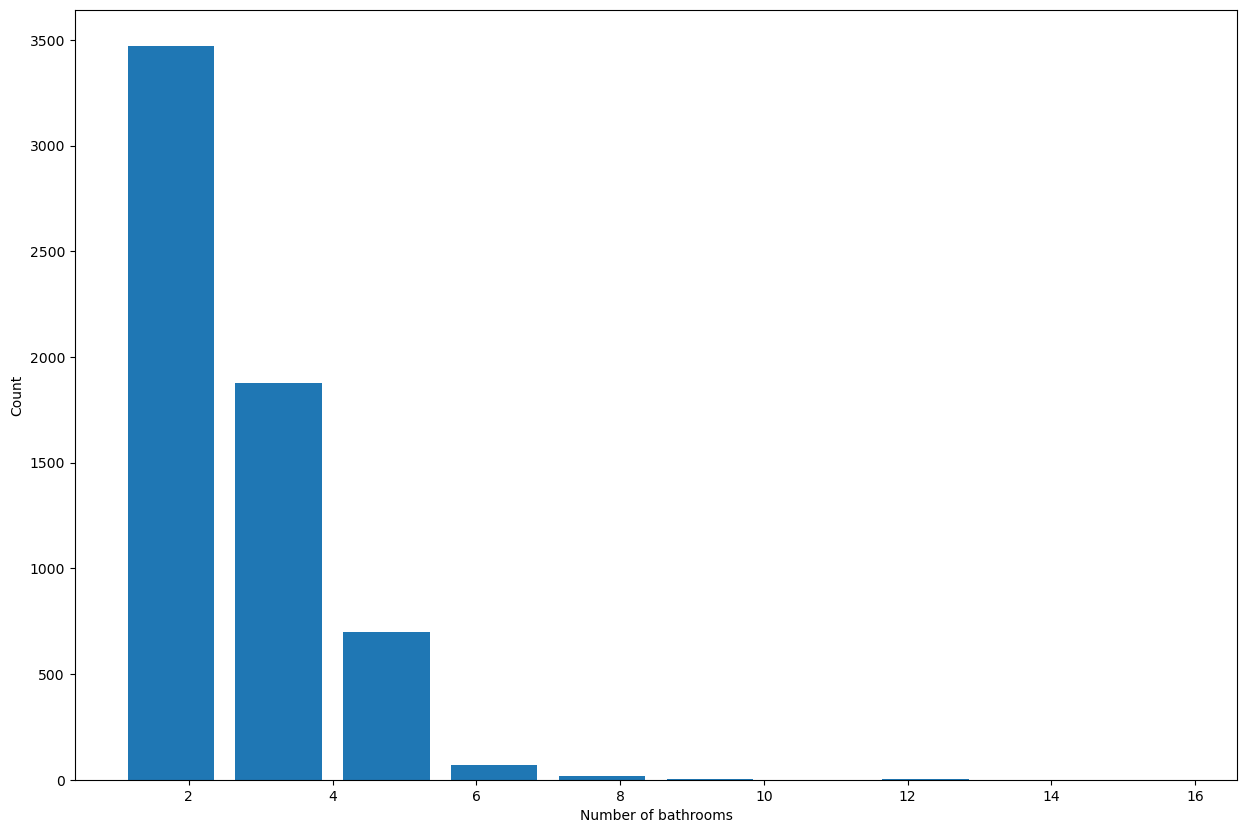

In [44]:
plt.hist(df8.bath, rwidth=0.8)
plt.xlabel('Number of bathrooms')
plt.ylabel('Count')

In [45]:
df8[df8.bath>df8.bedrooms+2]

,location,size,total_sqft,bath,price,bedrooms,price_per_sqft
3482,Other Lagos Areas,6 BHK,11338.0,9.0,9000.0,6,793790.792027
9420,Other Lagos Areas,4 Bedroom,7000.0,8.0,4050.0,4,578571.428571
9938,Other Lagos Areas,3 BHK,1806.0,6.0,1044.0,3,578073.089701


In [46]:
df9 = df8[df8.bath<df8.bedrooms+2]
df9.shape

(6074, 7)

In [47]:
df10 = df9.copy()
df10.head()

,location,size,total_sqft,bath,price,bedrooms,price_per_sqft
0,Abule,3 BHK,1767.0,3.0,927.0,3,524617.996604
1,Abule,2 BHK,1205.0,2.0,594.0,2,492946.058091
2,Abule,2 BHK,1250.0,2.0,684.0,2,547200.000000
3,Abule,2 BHK,1000.0,2.0,450.0,2,450000.000000
4,Abule,2 BHK,1281.0,2.0,666.0,2,519906.323185


In [48]:
df10['prices'] = (df10['price'] * 1000000)
df10.head(3)

,location,size,total_sqft,bath,price,bedrooms,price_per_sqft,prices
0,Abule,3 BHK,1767.0,3.0,927.0,3,524617.996604,927000000.0
1,Abule,2 BHK,1205.0,2.0,594.0,2,492946.058091,594000000.0
2,Abule,2 BHK,1250.0,2.0,684.0,2,547200.000000,684000000.0


In [49]:
df10['prices'].dtype

dtype('float64')

In [50]:
df11 = df10.drop(['size', 'price', 'price_per_sqft'], axis='columns')
df11

,location,total_sqft,bath,bedrooms,prices
0,Abule,1767.0,3.0,3,9.270000e+08
1,Abule,1205.0,2.0,2,5.940000e+08
2,Abule,1250.0,2.0,2,6.840000e+08
3,Abule,1000.0,2.0,2,4.500000e+08
4,Abule,1281.0,2.0,2,6.660000e+08
...,...,...,...,...,...
11140,other,1036.0,2.0,2,9.900000e+08
11141,other,708.0,1.0,2,4.950000e+08
11142,other,1200.0,4.0,4,1.260000e+09
11143,other,966.0,2.0,2,4.500000e+08


In [51]:
df11['price'] = df11['prices']
df11

,location,total_sqft,bath,bedrooms,prices,price
0,Abule,1767.0,3.0,3,9.270000e+08,9.270000e+08
1,Abule,1205.0,2.0,2,5.940000e+08,5.940000e+08
2,Abule,1250.0,2.0,2,6.840000e+08,6.840000e+08
3,Abule,1000.0,2.0,2,4.500000e+08,4.500000e+08
4,Abule,1281.0,2.0,2,6.660000e+08,6.660000e+08
...,...,...,...,...,...,...
11140,other,1036.0,2.0,2,9.900000e+08,9.900000e+08
11141,other,708.0,1.0,2,4.950000e+08,4.950000e+08
11142,other,1200.0,4.0,4,1.260000e+09,1.260000e+09
11143,other,966.0,2.0,2,4.500000e+08,4.500000e+08


In [52]:
df12 = df11.drop('prices', axis="columns")
df12

,location,total_sqft,bath,bedrooms,price
0,Abule,1767.0,3.0,3,9.270000e+08
1,Abule,1205.0,2.0,2,5.940000e+08
2,Abule,1250.0,2.0,2,6.840000e+08
3,Abule,1000.0,2.0,2,4.500000e+08
4,Abule,1281.0,2.0,2,6.660000e+08
...,...,...,...,...,...
11140,other,1036.0,2.0,2,9.900000e+08
11141,other,708.0,1.0,2,4.950000e+08
11142,other,1200.0,4.0,4,1.260000e+09
11143,other,966.0,2.0,2,4.500000e+08


In [53]:
df12['price'].dtype

dtype('float64')

In [54]:
dummies = pd.get_dummies(df12.location)
dummies.head(3)

,Abule,Abule Egba,Adeniyi Jones,Agege,Ajah,Alimosho,Bariga,Ebute Metta,Eko Atlantic,Festac,...,Mowe,Ojota,Opebi,Other Lagos Areas,Sangotedo,Shomolu,Surulere,Victoria Island,Yaba,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
df13 = pd.concat([df12, dummies.drop('Other Lagos Areas', axis='columns')], axis='columns')
df13.head()

,location,total_sqft,bath,bedrooms,price,Abule,Abule Egba,Adeniyi Jones,Agege,Ajah,...,Lekki,Mowe,Ojota,Opebi,Sangotedo,Shomolu,Surulere,Victoria Island,Yaba,other
0,Abule,1767.0,3.0,3,927000000.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Abule,1205.0,2.0,2,594000000.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Abule,1250.0,2.0,2,684000000.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Abule,1000.0,2.0,2,450000000.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Abule,1281.0,2.0,2,666000000.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
df14 = df13.drop('location', axis="columns")
df14

,total_sqft,bath,bedrooms,price,Abule,Abule Egba,Adeniyi Jones,Agege,Ajah,Alimosho,...,Lekki,Mowe,Ojota,Opebi,Sangotedo,Shomolu,Surulere,Victoria Island,Yaba,other
0,1767.0,3.0,3,9.270000e+08,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1205.0,2.0,2,5.940000e+08,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1250.0,2.0,2,6.840000e+08,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1000.0,2.0,2,4.500000e+08,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1281.0,2.0,2,6.660000e+08,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11140,1036.0,2.0,2,9.900000e+08,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11141,708.0,1.0,2,4.950000e+08,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11142,1200.0,4.0,4,1.260000e+09,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11143,966.0,2.0,2,4.500000e+08,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [57]:
X = df14.drop('price', axis='columns')
X.head()

,total_sqft,bath,bedrooms,Abule,Abule Egba,Adeniyi Jones,Agege,Ajah,Alimosho,Bariga,...,Lekki,Mowe,Ojota,Opebi,Sangotedo,Shomolu,Surulere,Victoria Island,Yaba,other
0,1767.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1205.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1250.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1000.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1281.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
y = df14.price
y.head()

0    927000000.0
1    594000000.0
2    684000000.0
3    450000000.0
4    666000000.0
Name: price, dtype: float64

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=5)

In [60]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.906660302656075

In [61]:
from sklearn.linear_model import Lasso
la = Lasso()
la.fit(X_train, y_train)
la.score(X_test, y_test)

0.9066603013399618

In [62]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state=10)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.91422668, 0.88451647, 0.862333  , 0.87813738, 0.87284291])

In [63]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state=10)
cross_val_score(Lasso(), X, y, cv=cv)

array([0.91422668, 0.88451648, 0.862333  , 0.87813738, 0.87284291])

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [66]:
def find_best_model(X,y):
    models = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False],
                'positive': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params':{
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
                'splitter': ['best', 'random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=10)
    for models_name, config in models.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': models_name,
            'best_score': gs.best_score_,
            'best_params':gs.best_params_
        })
    
    return pd.DataFrame(scores, columns=["model", "best_score", "best_params"])

find_best_model(X,y)

,model,best_score,best_params
0,linear_regression,0.882411,"{'fit_intercept': True, 'positive': False}"
1,lasso,0.882411,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.803284,"{'criterion': 'poisson', 'splitter': 'random'}"


In [67]:
def predict_price(location, sqft, bath, bedrooms):
    loc_index = np.where(X.columns==location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bedrooms
    if loc_index >= 0:
        x[loc_index] = 1
        
    return la.predict([x])[0]

In [68]:
import warnings
warnings.filterwarnings("ignore")

In [69]:
predict_price('Lekki', 1000, 2,2)

516126766.6290885

In [70]:
predict_price('Lekki', 1000, 3,3)

525527845.51007533

In [71]:
predict_price('Victoria Island', 1000, 2,2)

1175837359.5983467

In [72]:
import pickle
with open('lagos_state_home_prices_model', 'wb') as f:
    pickle.dump(la, f)

In [73]:
import json
columns = {
    'data_columns': [col.lower() for col in X.columns]
}
with open("lagos_state_columns.json", "w") as f:
    f.write(json.dumps(columns))